# 필수과제 : Etherscan.io API를 활용해 잔고 및 트랜잭션 정보 출력


## API Key 발급 방법
1. https://etherscan.io/register 에 접속해 회원가입을 합니다.
2. 로그인 후 우상단 계정 정보에서 'API Keys' 클릭(https://etherscan.io/myapikey)
3. '+ Add'라고 적힌 파란색 버튼 클릭
4. App Name 입력 후 'Create New API Key' 클릭
5. 다시 링크를 새로고침하면 API Key Token이 발급되었음을 확인할 수 있습니다.

* 참고 : 무료 API 플랜의 경우 초 당 5 calls까지 가능합니다.
* 참고 : https://docs.etherscan.io/


## 과제 요구사항

1. API를 호출하여 특정 Ethereum 주소에 대한 Address Balance(잔액)와 Transaction History(거래이력)를 출력하는 코드가 포함되어야 합니다. 주소는 '0x28818906195D1c430DE6FB67a4dE79520f1e3659'로 통일하겠습니다.
2. Transaction History 요소는 4개 이상 포함되어야 합니다.
3. 출력 결과는 예시와 비슷해야 하며, 본인의 API Key는 지우고 제출하시면 됩니다.

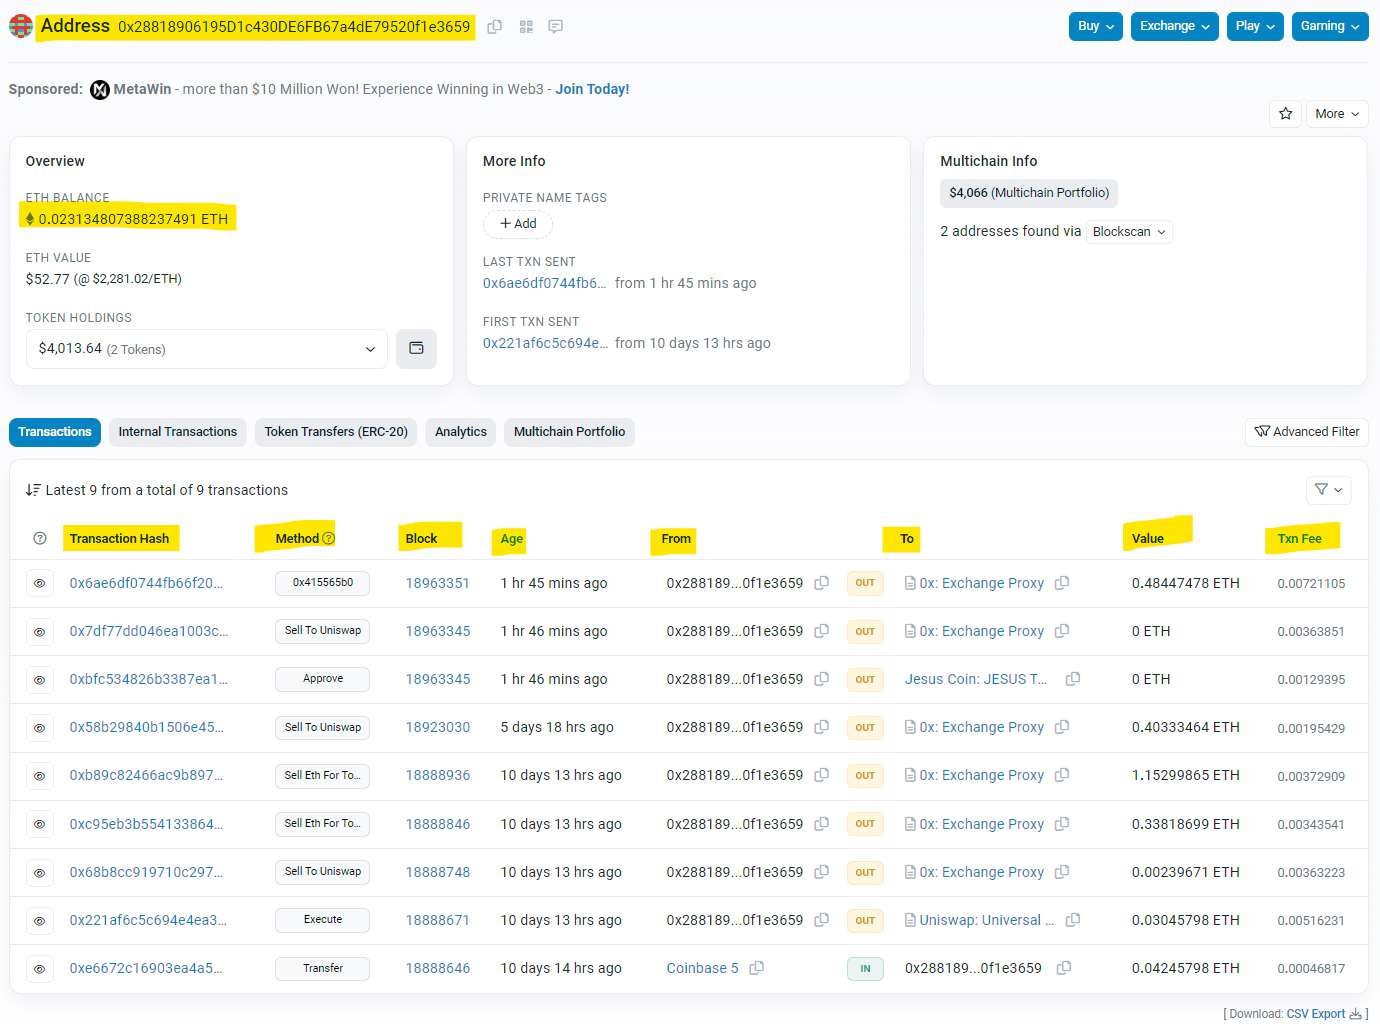

* 참고 : Transaction History에는 'Transaction Hash', 'Method', 'Block', 'Age', 'From', 'To', 'Value', 'Txn Fee' 등의 요소가 있습니다. 예시에서는 Transaction Hash와 Value 2개를 출력했습니다.

In [3]:
# 여기에 코드를 작성해주세요
import requests

ethereum_address = '0x28818906195D1c430DE6FB67a4dE79520f1e3659'
api_key = '__________________________'

# 잔액 조회
balance_url = f'https://api.etherscan.io/api?module=account&action=balance&address={ethereum_address}&apikey={api_key}'
balance_response = requests.get(balance_url)
balance_data = balance_response.json()
balance_wei = int(balance_data['result'])

# Wei를 이더로 변환
balance_eth = balance_wei / 10**18

# 결과 출력
print(f'Ethereum Address: {ethereum_address}')
print(f'Balance: {balance_eth} Ether')

# 거래 내역 조회 (이전 코드 그대로 사용)
transaction_url = f'https://api.etherscan.io/api?module=account&action=txlist&address={ethereum_address}&apikey={api_key}&sort=desc'
transaction_response = requests.get(transaction_url)
transaction_data = transaction_response.json()
transactions = transaction_data['result'][:4]  # 최근 4개의 거래만 가져오기

# Transaction History 출력
print('\nTransaction History:')
for transaction in transactions:
    print(f"Hash: {transaction['hash']}")
    print(f"From: {transaction['from']}")
    print(f"To: {transaction['to']}")
    print(f"Value: {transaction['value']} wei")
    print(f"Timestamp: {transaction['timeStamp']}")
    print('----------------------')


Ethereum Address: 0x28818906195D1c430DE6FB67a4dE79520f1e3659
Balance: 0.014556968666316571 Ether

Transaction History:
Hash: 0xfcb42dc785acbf80588a6963c8502e5c9074899bcf7e18196e5f0b726df01798
From: 0x28818906195d1c430de6fb67a4de79520f1e3659
To: 0xdef1c0ded9bec7f1a1670819833240f027b25eff
Value: 0 wei
Timestamp: 1704838403
----------------------
Hash: 0xabdfb3bb62bb4b944fa799fb0453507b210099f1fa08f64ab1d7139d2278660b
From: 0x28818906195d1c430de6fb67a4de79520f1e3659
To: 0xdac17f958d2ee523a2206206994597c13d831ec7
Value: 0 wei
Timestamp: 1704838403
----------------------
Hash: 0x6ae6df0744fb66f20297178c04d4e841d75f0323027862975c1954ab0fe5250d
From: 0x28818906195d1c430de6fb67a4de79520f1e3659
To: 0xdef1c0ded9bec7f1a1670819833240f027b25eff
Value: 484474785289583760 wei
Timestamp: 1704729779
----------------------
Hash: 0x7df77dd046ea1003c4a537f622f9bb28d2467b6bcef3ebbb2b4ea9ab3c0a652f
From: 0x28818906195d1c430de6fb67a4de79520f1e3659
To: 0xdef1c0ded9bec7f1a1670819833240f027b25eff
Value: 0 wei
T

In [ ]:
# 출력 예시

Address Balance: 0.02313480738823749 ETH

Transaction History:
TxHash: 0xe6672c16903ea4a5671f2aae985df2487339c9c28e9ee2f6766f22d4cd523eae, Value: 0.04245798 ETH
TxHash: 0x221af6c5c694e4ea33a81ecf83bd41a6e0c1a18f8b7a2083422af2714956fe2d, Value: 0.03045798 ETH
TxHash: 0x68b8cc919710c297ca13640facf740d81e02d2aa63ac02d48b728c7b9a10a7c6, Value: 0.002396719992590054 ETH
TxHash: 0xc95eb3b5541338649f1631ca2477769c4416892707d14e62c13b626b88bbc5b1, Value: 0.33818699633928984 ETH
TxHash: 0xb89c82466ac9b897ac50d7ddb13c860a88b959dbea1bccfa9d5e067bd5dd8996, Value: 1.152998654622383 ETH
TxHash: 0x58b29840b1506e45554a0ccee4809e56fe7f37b8960bcd1ad593d6d8bf4a90f1, Value: 0.40333464418635806 ETH
TxHash: 0xbfc534826b3387ea117d51be50eebe25837d89d439c1d4e2e1088a3e0f8e3269, Value: 0.0 ETH
TxHash: 0x7df77dd046ea1003c4a537f622f9bb28d2467b6bcef3ebbb2b4ea9ab3c0a652f, Value: 0.0 ETH
TxHash: 0x6ae6df0744fb66f20297178c04d4e841d75f0323027862975c1954ab0fe5250d, Value: 0.48447478528958376 ETH


# 도전과제 : openweathermap API를 활용해 서울의 날씨 예보 출력 및 시각화


## API Key 발급 방법
1. https://openweathermap.org/ 에 접속해 회원가입을 합니다.
2. 로그인 후 우상단 계정 정보에서 'My API Keys' 클릭(https://home.openweathermap.org/api_keys)
3. 'Create Key'에서 이름 입력 후 'Generate' 클릭
4. 다시 링크를 새로고침하면 Key가 발급되었음을 확인할 수 있습니다.

* 참고 : https://openweathermap.org/api/one-call-3
* 참고 : 회원가입을 하지 않고 무료 버전 API Subscribe가 가능하긴 한데, 이 경우 결제과정(과금은 안됨)이 추가되니 회원가입을 적극 권장



## 과제 요구사항

1. API를 호출하여 서울의 날씨 예보를 보여주고 시각화까지 진행해주세요.
2. '섭씨 온도, 습도, 풍속' 데이터는 반드시 포함되어야 합니다.
3. 출력 결과는 예시와 비슷해야 하며, 본인의 API Key는 지우고 제출하시면 됩니다.

* 참고 : 무료 API 플랜의 경우 분 당 60 calls, 5일 간의 3시간 단위 예보를 제공합니다.

            Start Time            End Time           Weather
0  2024-01-08 18:00:00 2024-01-08 21:00:00     broken clouds
1  2024-01-09 00:00:00 2024-01-09 00:00:00        light snow
2  2024-01-09 03:00:00 2024-01-09 03:00:00              snow
3  2024-01-09 06:00:00 2024-01-09 12:00:00        light snow
4  2024-01-09 15:00:00 2024-01-09 15:00:00   overcast clouds
5  2024-01-09 18:00:00 2024-01-10 06:00:00     broken clouds
6  2024-01-10 09:00:00 2024-01-10 12:00:00        few clouds
7  2024-01-10 15:00:00 2024-01-10 21:00:00         clear sky
8  2024-01-11 00:00:00 2024-01-11 00:00:00  scattered clouds
9  2024-01-11 03:00:00 2024-01-11 06:00:00   overcast clouds
10 2024-01-11 09:00:00 2024-01-11 12:00:00        few clouds
11 2024-01-11 15:00:00 2024-01-13 15:00:00         clear sky


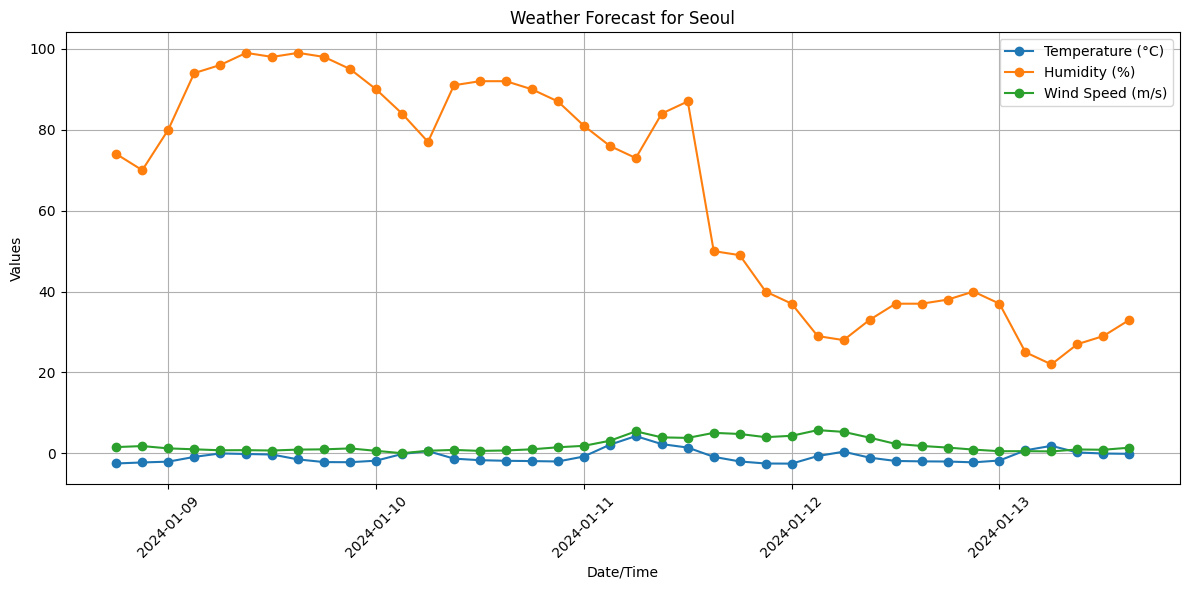

In [ ]:
# 코드 일부 및 출력 예시

import matplotlib.pyplot as plt
from datetime import datetime

def get_weather_forecast(api_key, city_name):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city_name,        # 검색할 도시 이름
        "appid": api_key,      # API 액세스 키
        "units": "metric"      # 온도를 섭씨로 받기 위해 metric 사용
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if response.status_code == 200:
            # 일기 예보 정보 불러오기

                # 날짜/시간 정보와 해당 시간의 온도, 습도, 바람 속도, 날씨를 리스트에 추가

            # 날씨 변동 사항 테이블로 출력

            # pandas DataFrame으로 변환하여 표 출력

            # 그래프 그리기

if __name__ == "__main__":
    # OpenWeatherMap API 키와 도시 이름 설정
    api_key = "#########"
    city_name = "Seoul"

    # 함수 호출로 일기 예보 정보 가져오기
    get_weather_forecast(api_key, city_name)

In [ ]:
# 여기에 코드를 작성해주세요

## 제출 안내

* 필수과제는 반드시 수행해야 하며, 도전과제는 선택이나 시도를 권장합니다.
* 코드 파일(.ipynb)을 본인 github 과제 repository에 제출
* 과제 기한 : 2024.1.17(수) 23:59
* 지각 제출 기한 : 2024.1.18(목) 23:59


### POSTMAN 실습 및 과제 : https://may24th.notion.site/may24th/POSTMAN-API-79a4ca11dcb44ee8a338b37ece6baf1a